<a href="https://colab.research.google.com/github/Likhithatugiti/Ensemble-learning-/blob/main/gc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [6]:
data = pd.read_excel('Concrete_Data.xls')


In [7]:
print(f"  Shape: {data.shape}")
print(f"\nFirst few rows:")
print(data.head())

  Shape: (1030, 9)

First few rows:
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (componen

In [8]:
print("\nMissing values per column:")
missing_values = data.isnull().sum()
print(missing_values)



Missing values per column:
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


From the observations, we can see that there are no missing values. Hence there is no need of imputation or any other methods to fill the values.

In [9]:
print(f"\nChecking for duplicate entries...")
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Checking for duplicate entries...
Number of duplicate rows: 25


In [10]:
data = data.drop_duplicates()

We checked whether there are any duplicate values in the dataset and dropped them. (Duplicate values increase the time complexity).

In [11]:
print(data.describe())

       Cement (component 1)(kg in a m^3 mixture)  \
count                                1005.000000   
mean                                  278.629055   
std                                   104.345003   
min                                   102.000000   
25%                                   190.680000   
50%                                   265.000000   
75%                                   349.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1005.000000       
mean                                           72.043134       
std                                            86.170555       
min                                             0.000000       
25%                                             0.000000       
50%                                            20.000000       
75%                                           142.500000       
max                

In [12]:
# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
feature_names = data.columns[:-1].tolist()
target_name = data.columns[-1]

In [13]:
print(f"\nFeatures: {feature_names}")
print(f"Target: {target_name}")


Features: ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']
Target: Concrete compressive strength(MPa, megapascals) 


In [14]:
# First split: 70% train, 30% temp (which will be split into val and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [15]:
# Second split: Split temp into 50% validation and 50% test (15% each of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42)

In [16]:
print(f"  Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

  Training set:   703 samples (70.0%)
  Validation set: 151 samples (15.0%)
  Test set:       151 samples (15.0%)



✓ Saved: Feature distributions plot


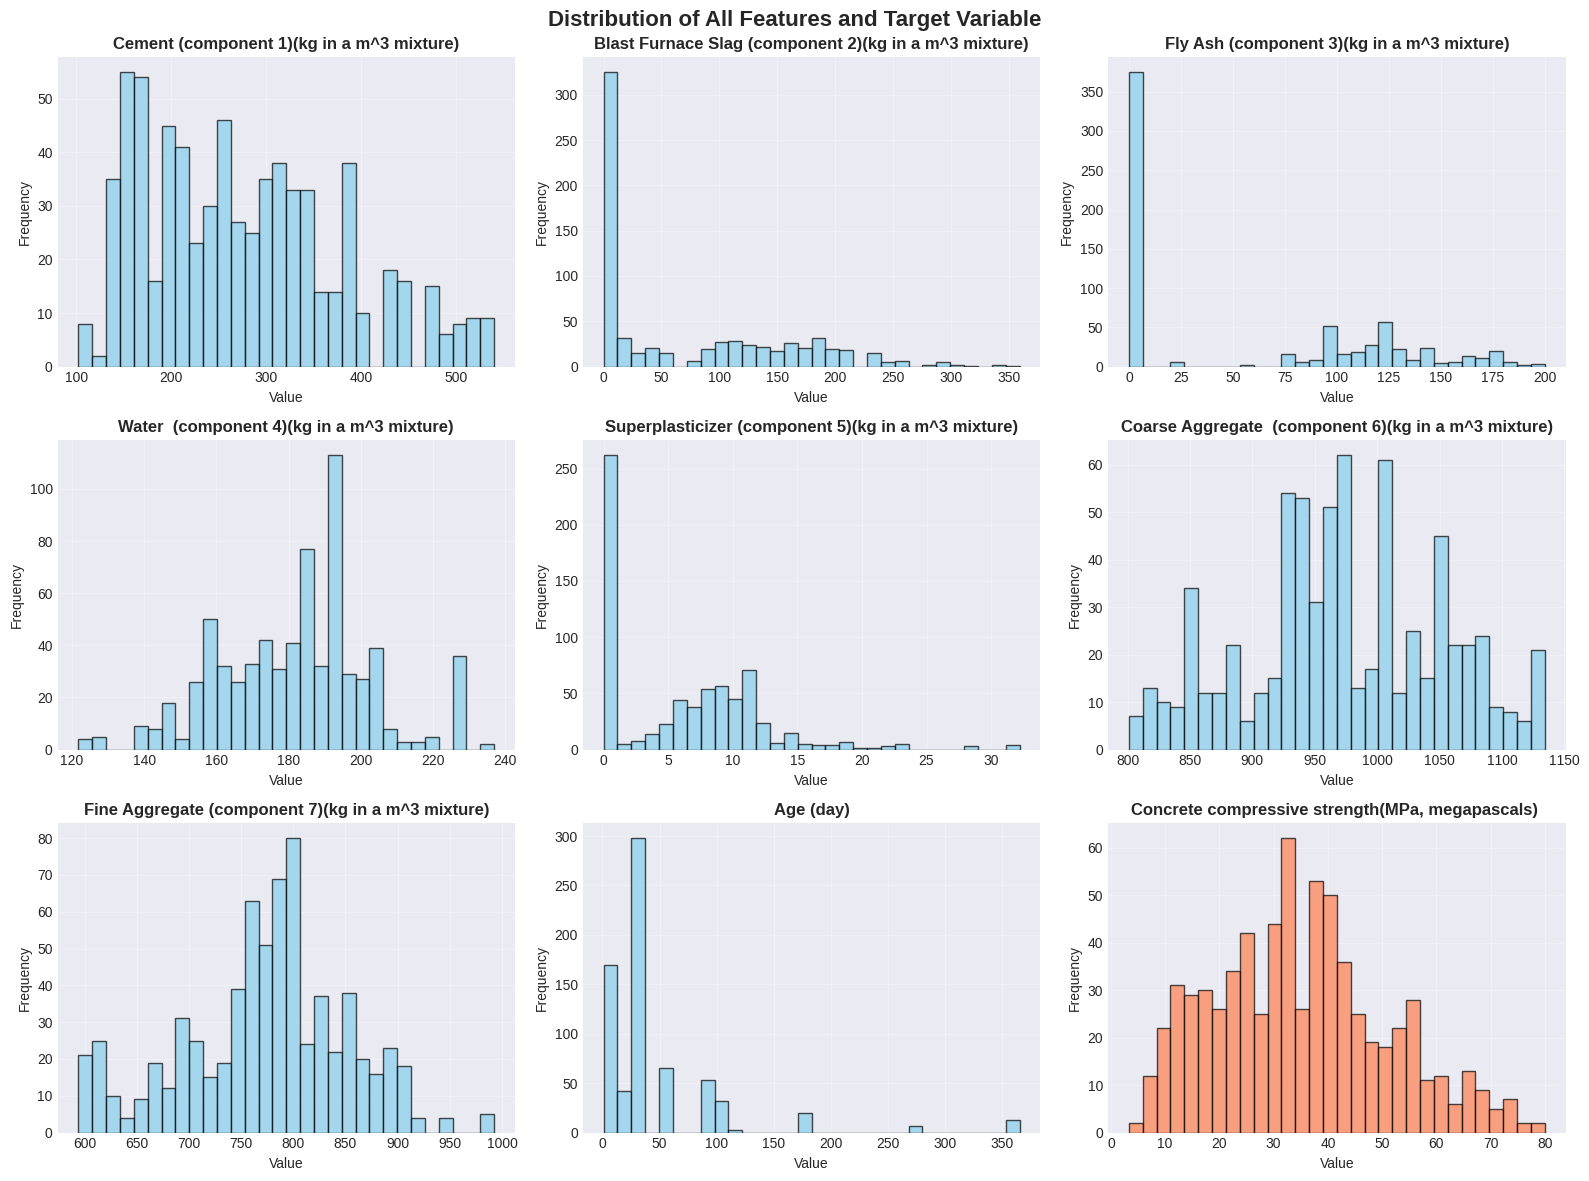

In [17]:
# Create training dataframe for visualization
train_df = pd.DataFrame(X_train, columns=feature_names)
train_df[target_name] = y_train

# Figure 1: Distribution of Features and Target
fig1, axes = plt.subplots(3, 3, figsize=(16, 12))
fig1.suptitle('Distribution of All Features and Target Variable', fontsize=16, fontweight='bold')

for idx, col in enumerate(data.columns):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]

    if col == target_name:
        train_df[col].hist(bins=30, ax=ax, color='coral', edgecolor='black', alpha=0.7)
    else:
        train_df[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)

    ax.set_title(col, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()

print("\n✓ Saved: Feature distributions plot")


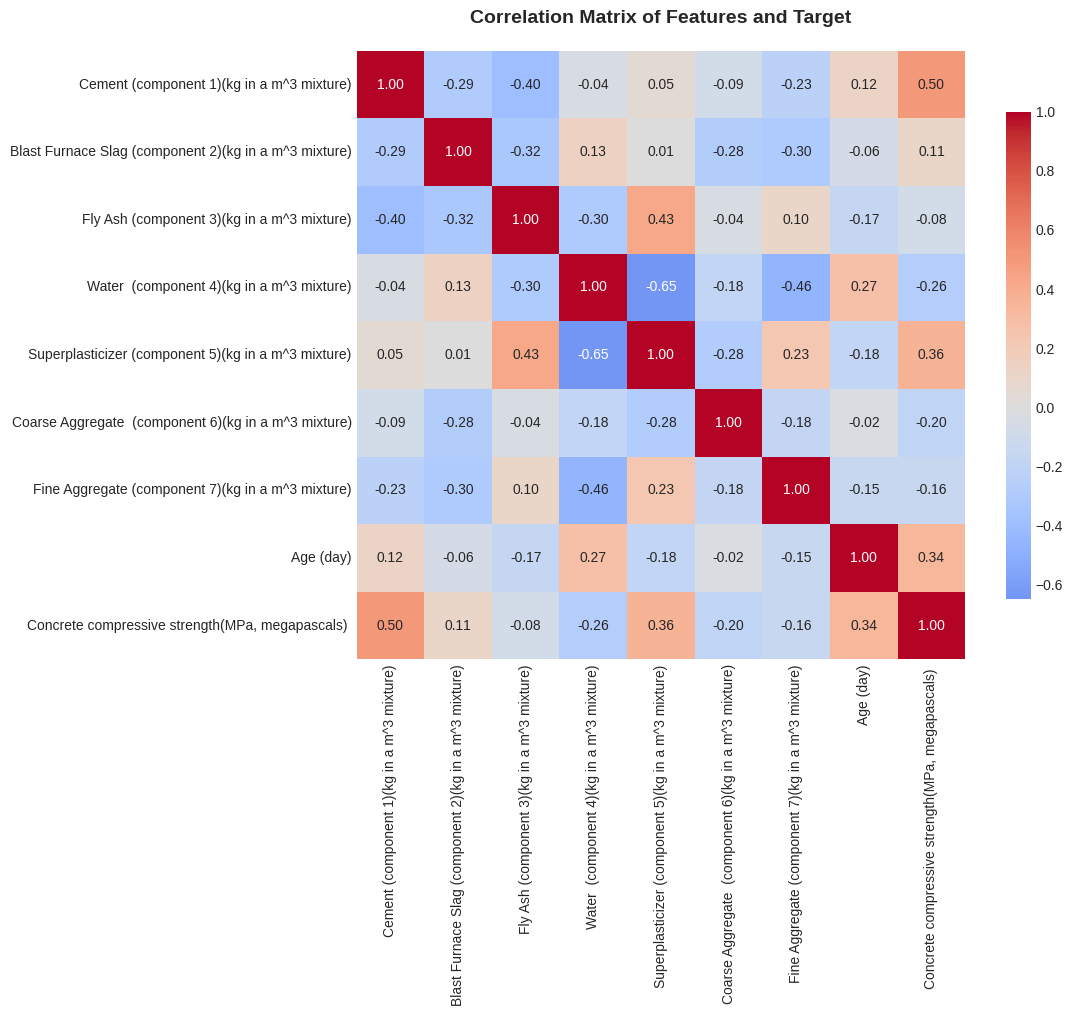

In [18]:
fig2, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=ax, cbar_kws={'shrink': 0.8})
ax.set_title('Correlation Matrix of Features and Target', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

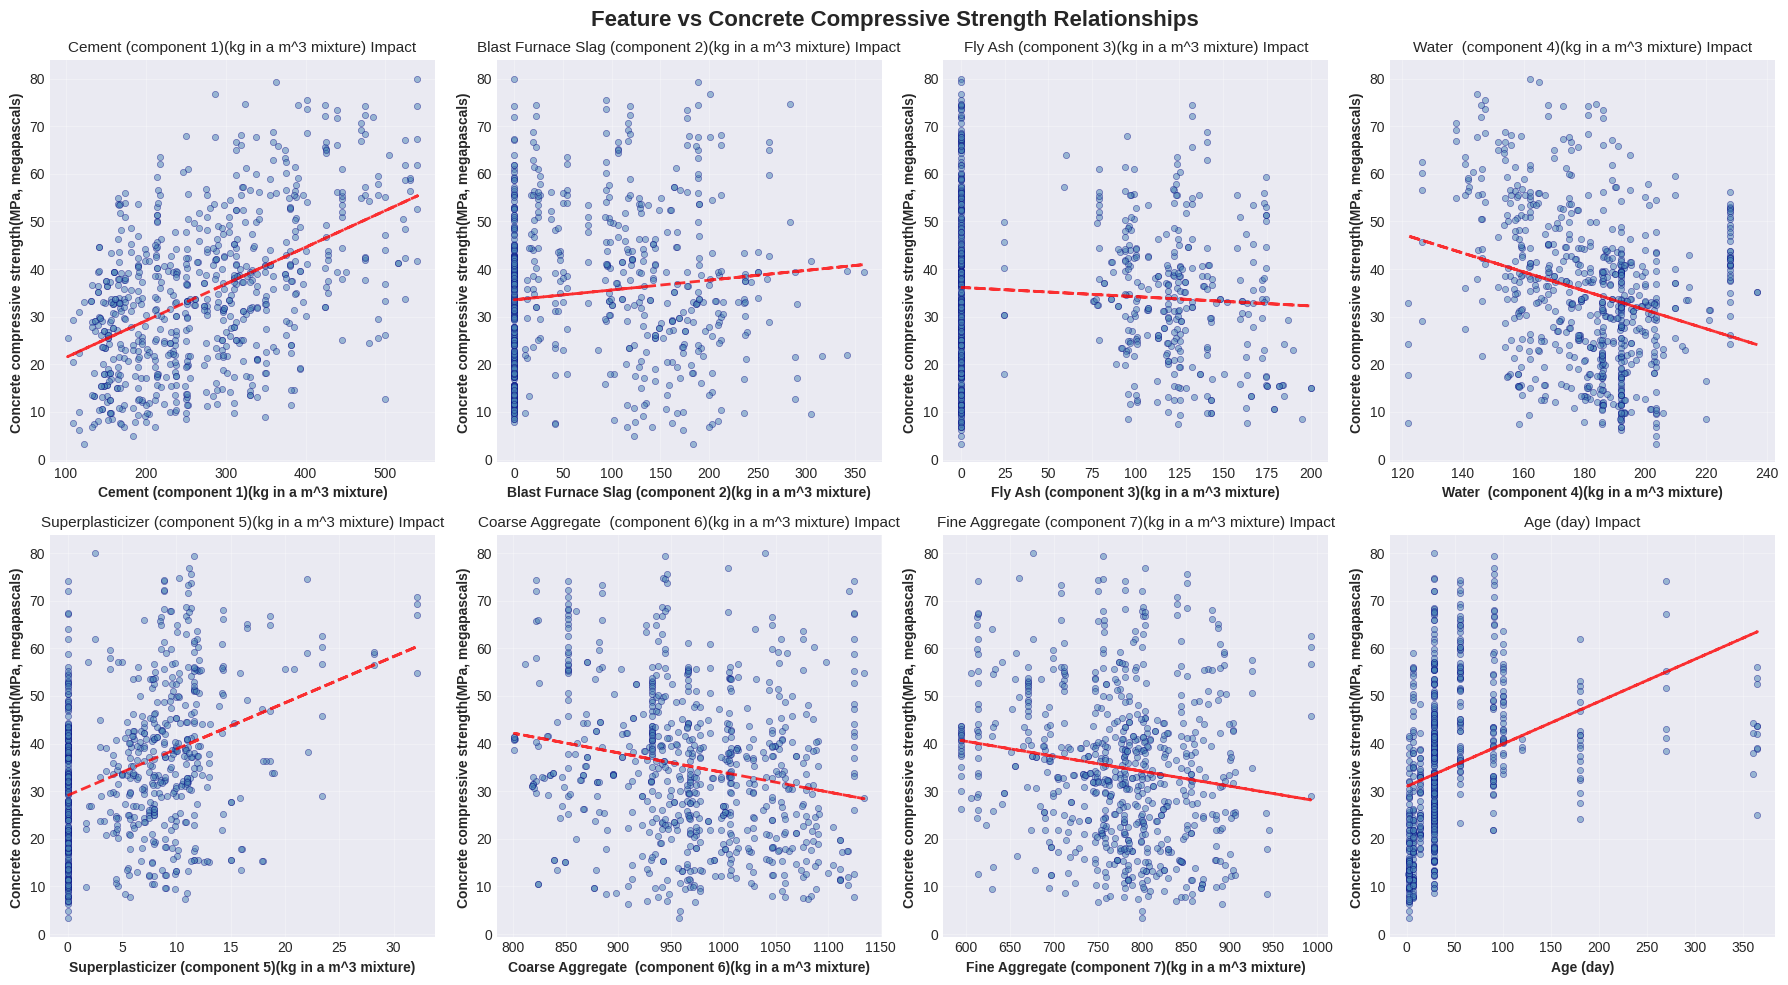

In [19]:
# Figure 3: Feature vs Target Scatter Plots
fig3, axes = plt.subplots(2, 4, figsize=(18, 10))
fig3.suptitle('Feature vs Concrete Compressive Strength Relationships',
              fontsize=16, fontweight='bold')

for idx, feature in enumerate(feature_names):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]

    ax.scatter(train_df[feature], train_df[target_name],
              alpha=0.5, s=20, color='steelblue', edgecolors='navy', linewidth=0.5)
    ax.set_xlabel(feature, fontweight='bold')
    ax.set_ylabel(target_name, fontweight='bold')
    ax.set_title(f'{feature} Impact', fontsize=11)
    ax.grid(True, alpha=0.3)

    # Add trend line
    z = np.polyfit(train_df[feature], train_df[target_name], 1)
    p = np.poly1d(z)
    ax.plot(train_df[feature], p(train_df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()

In [21]:
# Correlation insights
target_correlations = correlation_matrix[target_name].sort_values(ascending=False)
print("\n1. FEATURE CORRELATIONS WITH TARGET (Compressive Strength):")
print(target_correlations.to_string())


1. FEATURE CORRELATIONS WITH TARGET (Compressive Strength):
Concrete compressive strength(MPa, megapascals)          1.000000
Cement (component 1)(kg in a m^3 mixture)                0.499669
Superplasticizer (component 5)(kg in a m^3 mixture)      0.363020
Age (day)                                                0.343316
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.110567
Fly Ash (component 3)(kg in a m^3 mixture)              -0.079036
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.155763
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.199907
Water  (component 4)(kg in a m^3 mixture)               -0.260926


In [22]:
print("\n2. STRONGEST POSITIVE CORRELATIONS:")
positive_corr = target_correlations[target_correlations > 0.3]
for feat, corr in positive_corr.items():
    if feat != target_name:
        print(f"   • {feat}: {corr:.3f}")

print("\n3. STRONGEST NEGATIVE CORRELATIONS:")
negative_corr = target_correlations[target_correlations < -0.1]
for feat, corr in negative_corr.items():
    if feat != target_name:
        print(f"   • {feat}: {corr:.3f}")


2. STRONGEST POSITIVE CORRELATIONS:
   • Cement (component 1)(kg in a m^3 mixture): 0.500
   • Superplasticizer (component 5)(kg in a m^3 mixture): 0.363
   • Age (day): 0.343

3. STRONGEST NEGATIVE CORRELATIONS:
   • Fine Aggregate (component 7)(kg in a m^3 mixture): -0.156
   • Coarse Aggregate  (component 6)(kg in a m^3 mixture): -0.200
   • Water  (component 4)(kg in a m^3 mixture): -0.261


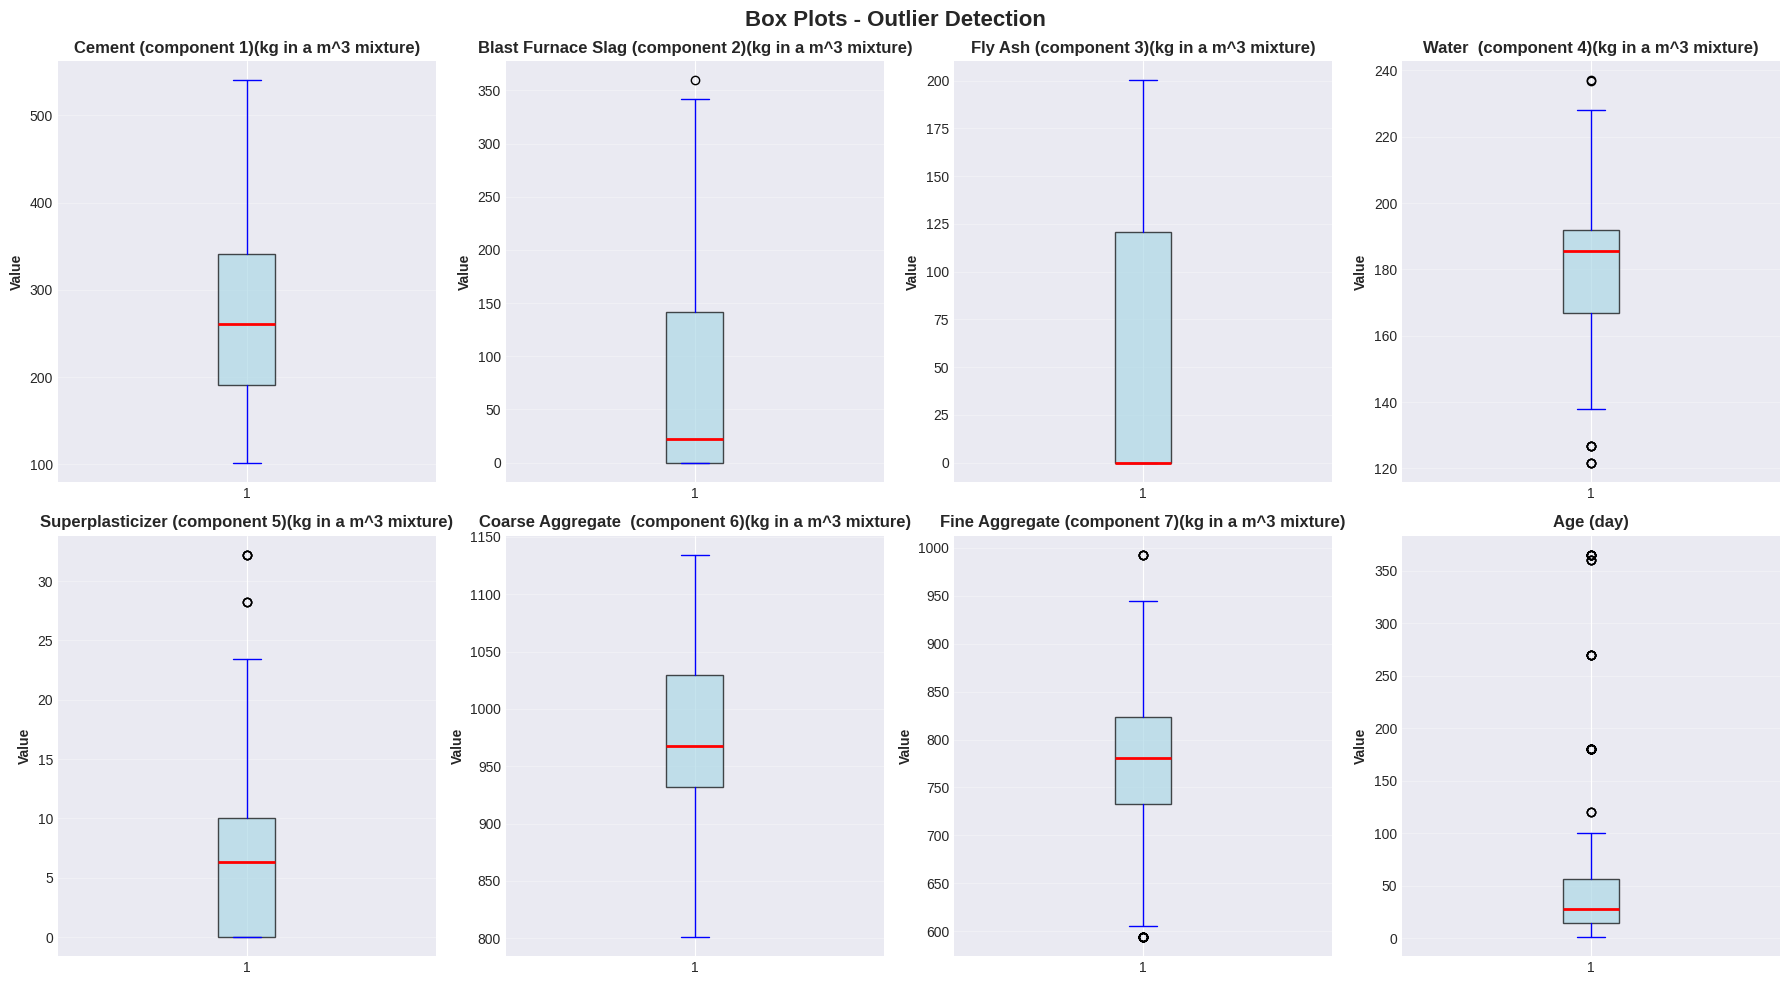

In [20]:
# Figure 4: Box plots to identify outliers
fig4, axes = plt.subplots(2, 4, figsize=(18, 10))
fig4.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')

for idx, feature in enumerate(feature_names):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]

    ax.boxplot(train_df[feature], vert=True, patch_artist=True,
               boxprops=dict(facecolor='lightblue', alpha=0.7),
               medianprops=dict(color='red', linewidth=2),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
    ax.set_ylabel('Value', fontweight='bold')
    ax.set_title(feature, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()

In [23]:
# Outlier detection
print("\n4. OUTLIER ANALYSIS (values beyond 1.5*IQR):")
for feature in feature_names:
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_df[(train_df[feature] < Q1 - 1.5*IQR) |
                        (train_df[feature] > Q3 + 1.5*IQR)][feature]
    if len(outliers) > 0:
        print(f"   • {feature}: {len(outliers)} outliers ({len(outliers)/len(train_df)*100:.1f}%)")

print("\n5. TARGET VARIABLE STATISTICS:")
print(f"   • Mean strength: {train_df[target_name].mean():.2f} MPa")
print(f"   • Std deviation: {train_df[target_name].std():.2f} MPa")
print(f"   • Min strength: {train_df[target_name].min():.2f} MPa")
print(f"   • Max strength: {train_df[target_name].max():.2f} MPa")
print(f"   • Range: {train_df[target_name].max() - train_df[target_name].min():.2f} MPa")


4. OUTLIER ANALYSIS (values beyond 1.5*IQR):
   • Blast Furnace Slag (component 2)(kg in a m^3 mixture): 1 outliers (0.1%)
   • Water  (component 4)(kg in a m^3 mixture): 11 outliers (1.6%)
   • Superplasticizer (component 5)(kg in a m^3 mixture): 7 outliers (1.0%)
   • Fine Aggregate (component 7)(kg in a m^3 mixture): 24 outliers (3.4%)
   • Age (day): 43 outliers (6.1%)

5. TARGET VARIABLE STATISTICS:
   • Mean strength: 35.04 MPa
   • Std deviation: 15.98 MPa
   • Min strength: 3.32 MPa
   • Max strength: 79.99 MPa
   • Range: 76.67 MPa


In [27]:
# For a single column
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# For multiple columns (remove row if ANY column has outlier)
def remove_outliers_iqr_multiple(df, columns):
    df_clean = df.copy()

    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within bounds
        df_clean = df_clean[
            (df_clean[column] >= lower_bound) &
            (df_clean[column] <= upper_bound)
        ]

    return df_clean

# Usage
columns_to_check = ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']
data = remove_outliers_iqr_multiple(data, columns_to_check)

print(f"Original shape: {data.shape}")
print(f"After removing outliers: {data.shape}")

Original shape: (919, 9)
After removing outliers: (919, 9)


We have checked if there are any outliers and found some. As there are a less number of outliers, removal of them does not affect the amount of data by a large extent. So we removed them by interquartile method for better training of the data.

In [28]:
class AdaBoostR2Scratch:
    """
    AdaBoost.R2 implementation from scratch using decision tree stumps.

    Based on the AdaBoost.R2 algorithm:
    - Drucker, H. (1997). Improving regressors using boosting techniques.

    Parameters:
    -----------
    n_estimators : int
        Number of weak learners (decision tree stumps)
    random_state : int
        Random seed for reproducibility
    """

    def __init__(self, n_estimators=50, random_state=42):
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators = []
        self.estimator_weights = []
        self.estimator_errors = []

    def fit(self, X, y):
        """
        Train the AdaBoost.R2 regressor.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]

        # Initialize sample weights uniformly
        sample_weights = np.ones(n_samples) / n_samples

        for m in range(self.n_estimators):
            # Train a weak learner (decision tree stump)
            estimator = DecisionTreeRegressor(
                max_depth=1,
                random_state=self.random_state + m
            )
            estimator.fit(X, y, sample_weight=sample_weights)

            # Make predictions
            y_pred = estimator.predict(X)

            # Calculate absolute error
            error_vect = np.abs(y - y_pred)

            # Normalize errors to [0, 1]
            error_max = error_vect.max()
            if error_max != 0:
                error_vect = error_vect / error_max

            # Calculate weighted average error
            avg_error = (sample_weights * error_vect).sum()

            # Avoid division by zero and check for perfect fit
            if avg_error >= 0.5 or avg_error <= 0:
                # If error is too high or learner is perfect, stop
                if m == 0:
                    self.estimators.append(estimator)
                    self.estimator_weights.append(1.0)
                    self.estimator_errors.append(avg_error)
                break

            # Calculate estimator weight (beta)
            beta = avg_error / (1 - avg_error)

            # Store estimator and its weight
            self.estimators.append(estimator)
            estimator_weight = np.log(1 / beta)
            self.estimator_weights.append(estimator_weight)
            self.estimator_errors.append(avg_error)

            # Update sample weights
            sample_weights = sample_weights * np.power(beta, 1 - error_vect)

            # Normalize weights
            sample_weights = sample_weights / sample_weights.sum()

        return self

    def predict(self, X):
        """
        Make predictions using the trained ensemble.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Samples to predict

        Returns:
        --------
        y_pred : array-like, shape (n_samples,)
            Predicted values
        """
        # Collect all predictions
        predictions = np.zeros((X.shape[0], len(self.estimators)))

        for i, estimator in enumerate(self.estimators):
            predictions[:, i] = estimator.predict(X)

        # Weighted median prediction
        # For simplicity, using weighted mean as it's more stable
        weights = np.array(self.estimator_weights)

        # Normalize weights
        if weights.sum() > 0:
            weights = weights / weights.sum()

        # Weighted average prediction
        y_pred = np.average(predictions, axis=1, weights=weights)

        return y_pred

print("\n✓ AdaBoost.R2 class implementation completed!")
print("  Key features:")
print("  • Uses decision tree stumps (max_depth=1) as base learners")
print("  • Implements weighted sample boosting")
print("  • Uses weighted average for final predictions")


✓ AdaBoost.R2 class implementation completed!
  Key features:
  • Uses decision tree stumps (max_depth=1) as base learners
  • Implements weighted sample boosting
  • Uses weighted average for final predictions


In [29]:
M_values = [5, 10, 20, 40, 60, 80, 100, 150, 200, 500, 1000, 5000, 10000]
validation_scores = []
training_scores = []

print("\nTesting different values of M (number of weak learners)...")
print("-" * 60)

for M in M_values:
    print(f"Training with M = {M:5d}...", end=" ")

    # Train model
    model = AdaBoostR2Scratch(n_estimators=M, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    training_scores.append(train_r2)
    validation_scores.append(val_r2)

    print(f"Train R² = {train_r2:.4f}, Val R² = {val_r2:.4f}")

# Find best M
best_idx = np.argmax(validation_scores)
best_M = M_values[best_idx]
best_val_r2 = validation_scores[best_idx]


Testing different values of M (number of weak learners)...
------------------------------------------------------------
Training with M =     5... Train R² = 0.4139, Val R² = 0.3855
Training with M =    10... Train R² = 0.4408, Val R² = 0.4317
Training with M =    20... Train R² = 0.4487, Val R² = 0.4472
Training with M =    40... Train R² = 0.4568, Val R² = 0.4688
Training with M =    60... Train R² = 0.4621, Val R² = 0.4760
Training with M =    80... Train R² = 0.4679, Val R² = 0.4870
Training with M =   100... Train R² = 0.4684, Val R² = 0.4938
Training with M =   150... Train R² = 0.4722, Val R² = 0.4987
Training with M =   200... Train R² = 0.4733, Val R² = 0.5016
Training with M =   500... Train R² = 0.4733, Val R² = 0.5016
Training with M =  1000... Train R² = 0.4733, Val R² = 0.5016
Training with M =  5000... Train R² = 0.4733, Val R² = 0.5016
Training with M = 10000... Train R² = 0.4733, Val R² = 0.5016


In [30]:
print("\n" + "="*60)
print(f"✓ BEST MODEL FOUND:")
print(f"  Optimal M = {best_M}")
print(f"  Validation R² = {best_val_r2:.4f}")
print("="*60)


✓ BEST MODEL FOUND:
  Optimal M = 200
  Validation R² = 0.5016


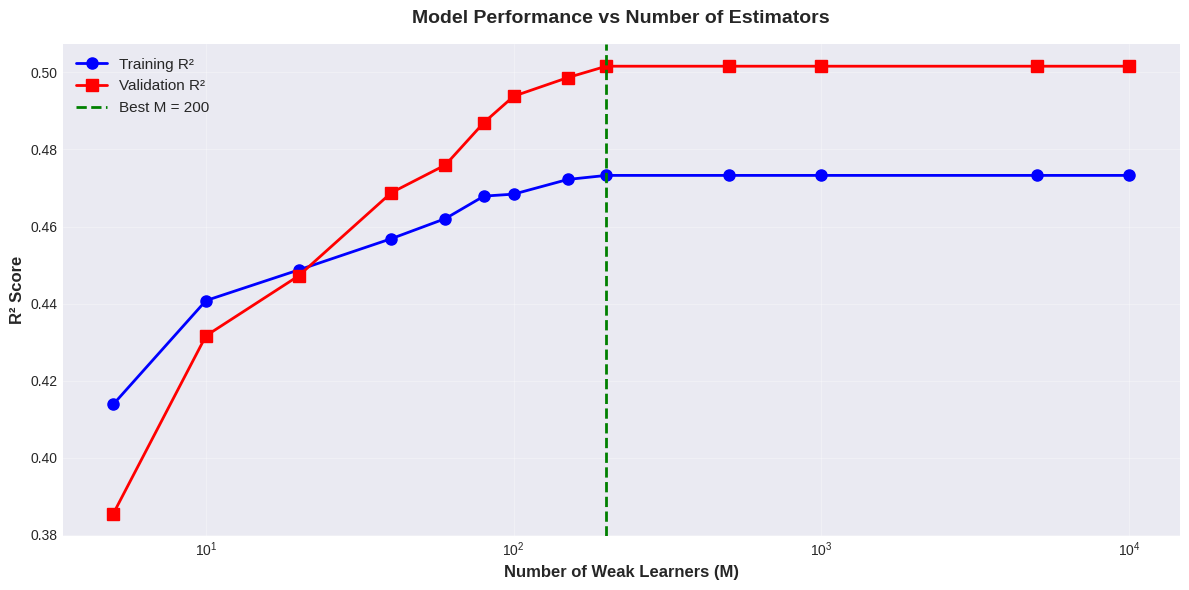

In [31]:
fig5, ax = plt.subplots(figsize=(12, 6))
ax.plot(M_values, training_scores, 'o-', label='Training R²',
        linewidth=2, markersize=8, color='blue')
ax.plot(M_values, validation_scores, 's-', label='Validation R²',
        linewidth=2, markersize=8, color='red')
ax.axvline(x=best_M, color='green', linestyle='--', linewidth=2,
          label=f'Best M = {best_M}')
ax.set_xlabel('Number of Weak Learners (M)', fontsize=12, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance vs Number of Estimators',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
plt.tight_layout()

In [32]:
print(f"\nTraining final model with M = {best_M}...")
final_model_custom = AdaBoostR2Scratch(n_estimators=best_M, random_state=42)
final_model_custom.fit(X_train, y_train)

# Predict on test set
y_test_pred_custom = final_model_custom.predict(X_test)

# Calculate metrics
r2_custom = r2_score(y_test, y_test_pred_custom)
mse_custom = mean_squared_error(y_test, y_test_pred_custom)
rmse_custom = np.sqrt(mse_custom)
mae_custom = mean_absolute_error(y_test, y_test_pred_custom)

print("\n✓ CUSTOM ADABOOST.R2 TEST SET PERFORMANCE:")
print("-" * 60)
print(f"  R² Score:  {r2_custom:.4f}")
print(f"  RMSE:      {rmse_custom:.4f} MPa")
print(f"  MAE:       {mae_custom:.4f} MPa")
print("-" * 60)


Training final model with M = 200...

✓ CUSTOM ADABOOST.R2 TEST SET PERFORMANCE:
------------------------------------------------------------
  R² Score:  0.4638
  RMSE:      11.6047 MPa
  MAE:       9.8088 MPa
------------------------------------------------------------


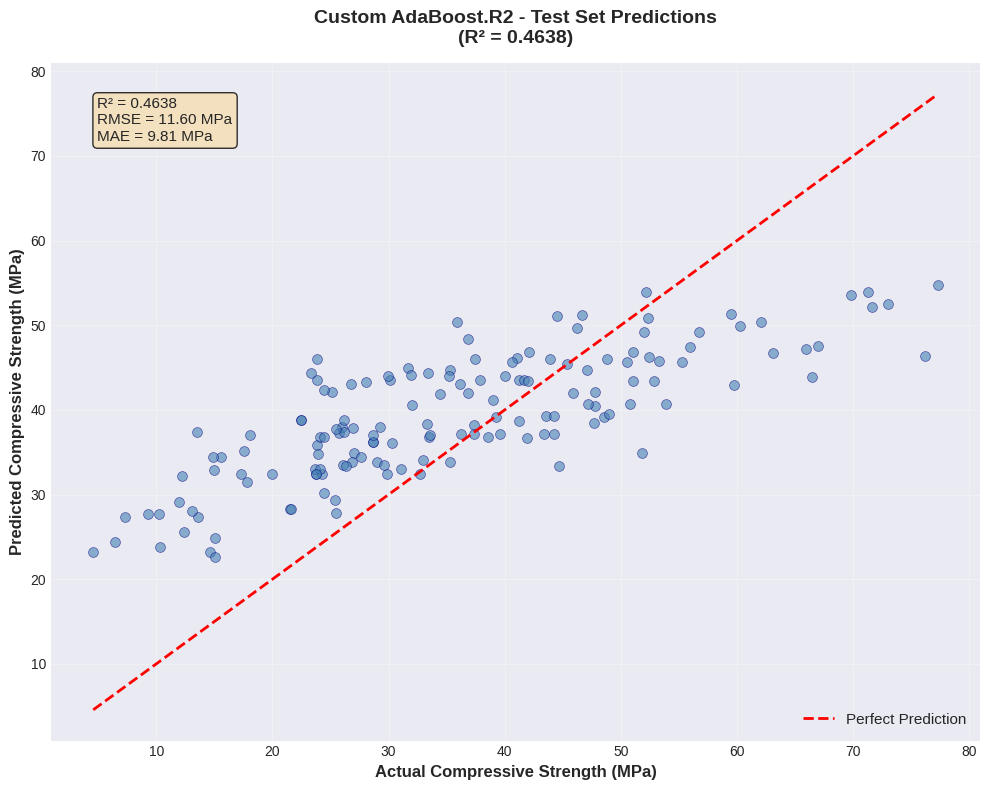

In [34]:
fig6, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y_test, y_test_pred_custom, alpha=0.6, s=50,
          color='steelblue', edgecolors='navy', linewidth=0.5)

# Add perfect prediction line
min_val = min(y_test.min(), y_test_pred_custom.min())
max_val = max(y_test.max(), y_test_pred_custom.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2,
        label='Perfect Prediction')

ax.set_xlabel('Actual Compressive Strength (MPa)', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Compressive Strength (MPa)', fontsize=12, fontweight='bold')
ax.set_title(f'Custom AdaBoost.R2 - Test Set Predictions\n(R² = {r2_custom:.4f})',
            fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Add text box with metrics
textstr = f'R² = {r2_custom:.4f}\nRMSE = {rmse_custom:.2f} MPa\nMAE = {mae_custom:.2f} MPa'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()

Training with Scikit-learn Adaboost function

In [35]:
# Initialize and train sklearn's AdaBoost
base_estimator = DecisionTreeRegressor(max_depth=1, random_state=42)
final_model_sklearn = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators= 1000,
    random_state=42,
    loss='linear'  # Using linear loss (similar to R2 algorithm)
)
final_model_sklearn.fit(X_train, y_train)

# Predict on test set
y_test_pred_sklearn = final_model_sklearn.predict(X_test)

# Calculate metrics
r2_sklearn = r2_score(y_test, y_test_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_test_pred_sklearn)

print("\n✓ SCIKIT-LEARN ADABOOST TEST SET PERFORMANCE:")
print("-" * 60)
print(f"  R² Score:  {r2_sklearn:.4f}")
print(f"  RMSE:      {rmse_sklearn:.4f} MPa")
print(f"  MAE:       {mae_sklearn:.4f} MPa")
print("-" * 60)


✓ SCIKIT-LEARN ADABOOST TEST SET PERFORMANCE:
------------------------------------------------------------
  R² Score:  0.4519
  RMSE:      11.7327 MPa
  MAE:       9.4468 MPa
------------------------------------------------------------


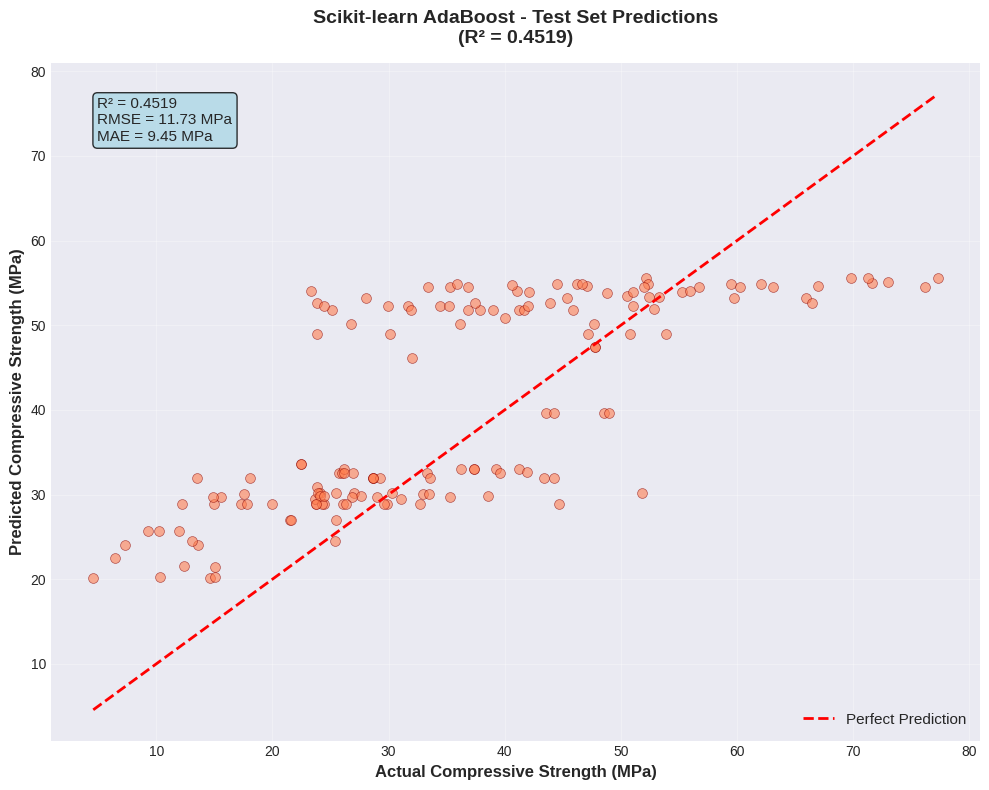

In [36]:
fig7, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y_test, y_test_pred_sklearn, alpha=0.6, s=50,
          color='coral', edgecolors='darkred', linewidth=0.5)

# Add perfect prediction line
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2,
        label='Perfect Prediction')

ax.set_xlabel('Actual Compressive Strength (MPa)', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Compressive Strength (MPa)', fontsize=12, fontweight='bold')
ax.set_title(f'Scikit-learn AdaBoost - Test Set Predictions\n(R² = {r2_sklearn:.4f})',
            fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Add text box with metrics
textstr = f'R² = {r2_sklearn:.4f}\nRMSE = {rmse_sklearn:.2f} MPa\nMAE = {mae_sklearn:.2f} MPa'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()

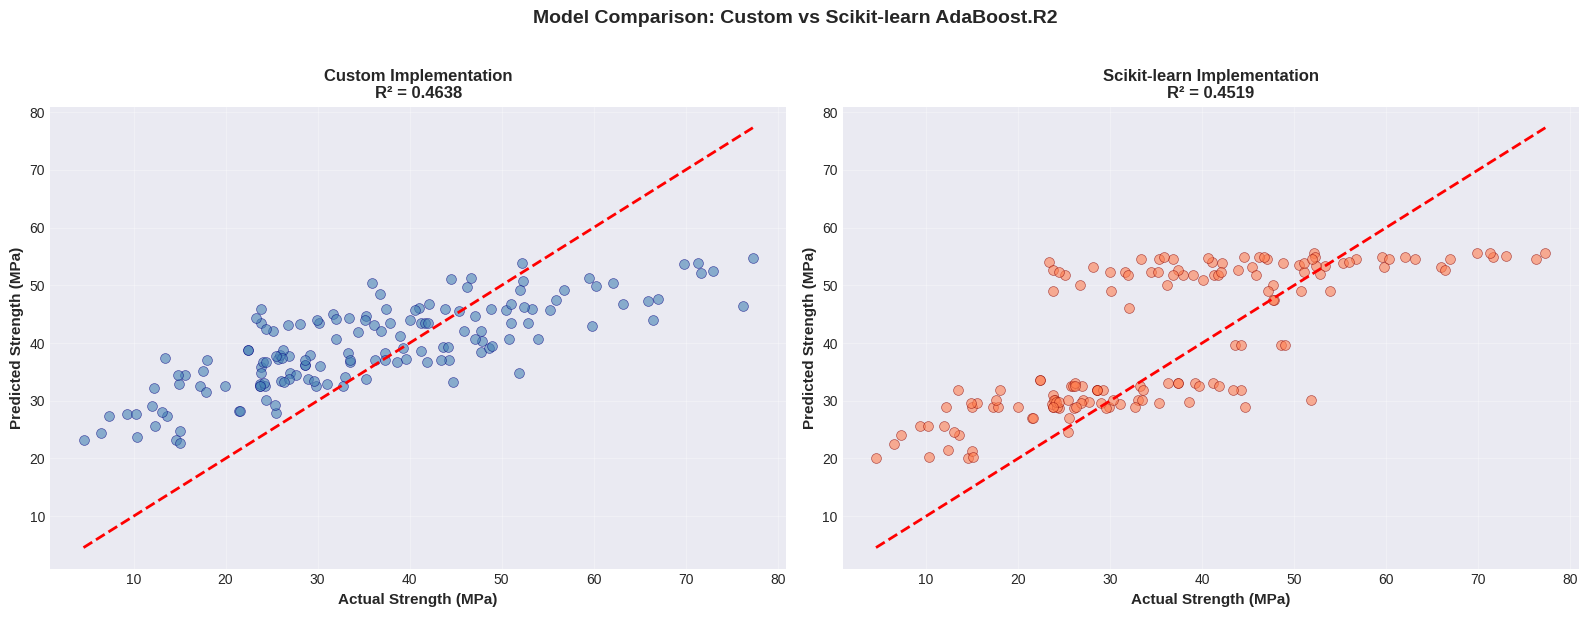

In [37]:
# Side-by-side comparison plot
fig8, axes = plt.subplots(1, 2, figsize=(16, 6))

# Custom model
axes[0].scatter(y_test, y_test_pred_custom, alpha=0.6, s=50,
               color='steelblue', edgecolors='navy', linewidth=0.5)
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Strength (MPa)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Predicted Strength (MPa)', fontsize=11, fontweight='bold')
axes[0].set_title(f'Custom Implementation\nR² = {r2_custom:.4f}',
                 fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Sklearn model
axes[1].scatter(y_test, y_test_pred_sklearn, alpha=0.6, s=50,
               color='coral', edgecolors='darkred', linewidth=0.5)
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[1].set_xlabel('Actual Strength (MPa)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Predicted Strength (MPa)', fontsize=11, fontweight='bold')
axes[1].set_title(f'Scikit-learn Implementation\nR² = {r2_sklearn:.4f}',
                 fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

fig8.suptitle('Model Comparison: Custom vs Scikit-learn AdaBoost.R2',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()


--------------------------------------------------------------------------------
DETAILED PERFORMANCE COMPARISON
--------------------------------------------------------------------------------
Metric               Custom Model         Scikit-learn         Difference          
--------------------------------------------------------------------------------
R² Score             0.4638               0.4519               0.0119              
RMSE (MPa)           11.6047              11.7327              0.1280              
MAE (MPa)            9.8088               9.4468               0.3621              
MSE (MPa²)           134.6691             137.6573             2.9882              
--------------------------------------------------------------------------------


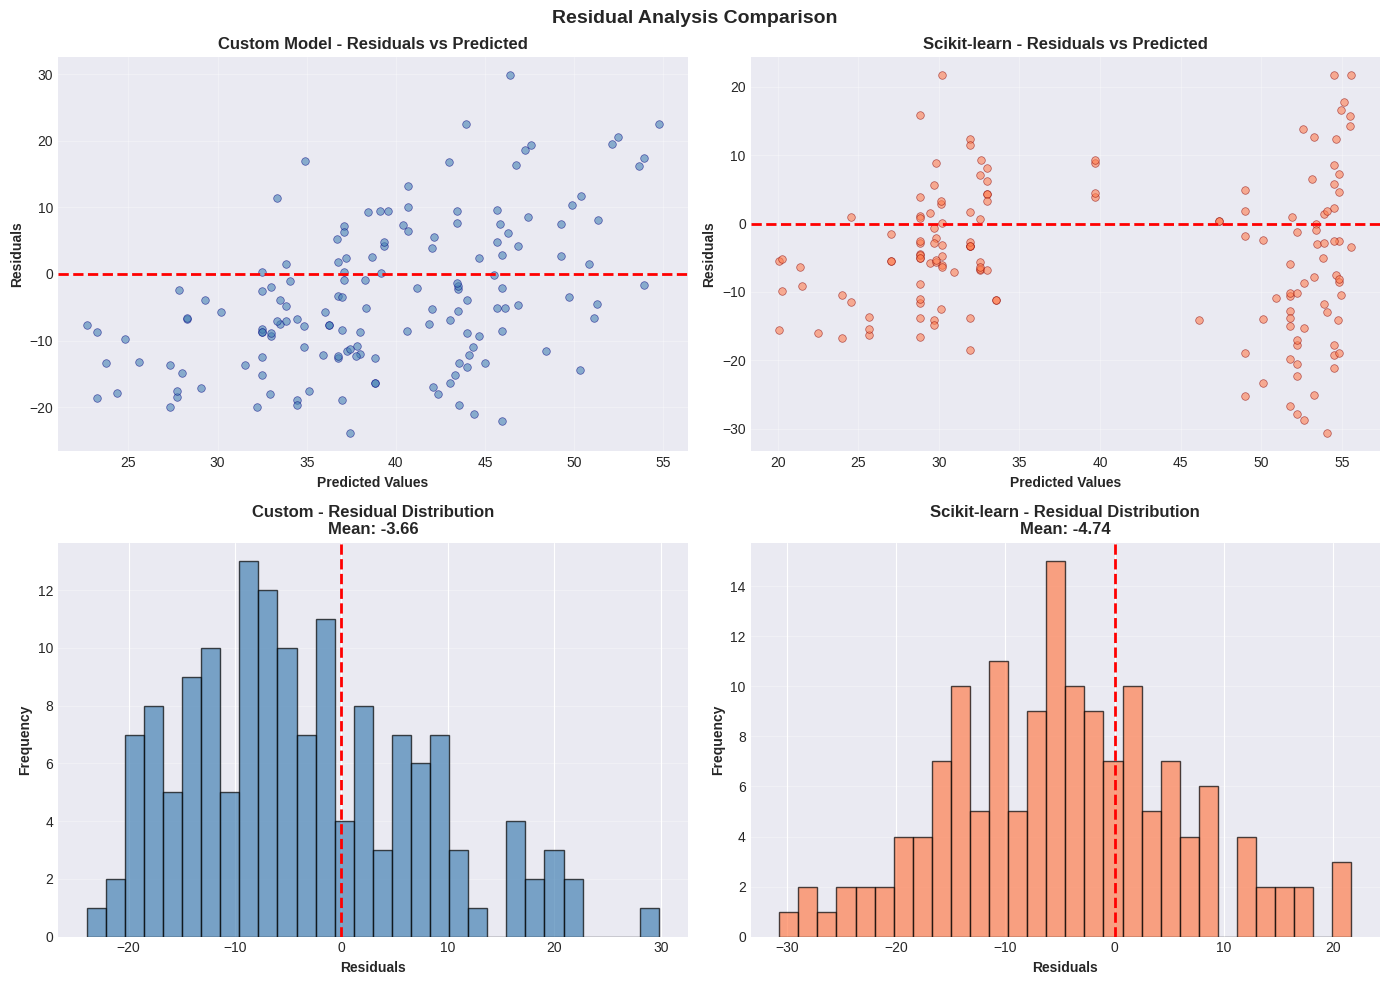

In [38]:
print("\n" + "-"*80)
print("DETAILED PERFORMANCE COMPARISON")
print("-"*80)
print(f"{'Metric':<20} {'Custom Model':<20} {'Scikit-learn':<20} {'Difference':<20}")
print("-"*80)
print(f"{'R² Score':<20} {r2_custom:<20.4f} {r2_sklearn:<20.4f} {abs(r2_custom-r2_sklearn):<20.4f}")
print(f"{'RMSE (MPa)':<20} {rmse_custom:<20.4f} {rmse_sklearn:<20.4f} {abs(rmse_custom-rmse_sklearn):<20.4f}")
print(f"{'MAE (MPa)':<20} {mae_custom:<20.4f} {mae_sklearn:<20.4f} {abs(mae_custom-mae_sklearn):<20.4f}")
print(f"{'MSE (MPa²)':<20} {mse_custom:<20.4f} {mse_sklearn:<20.4f} {abs(mse_custom-mse_sklearn):<20.4f}")
print("-"*80)

# Residual analysis
residuals_custom = y_test - y_test_pred_custom
residuals_sklearn = y_test - y_test_pred_sklearn

fig9, axes = plt.subplots(2, 2, figsize=(14, 10))
fig9.suptitle('Residual Analysis Comparison', fontsize=14, fontweight='bold')

# Custom residuals
axes[0, 0].scatter(y_test_pred_custom, residuals_custom, alpha=0.6, s=30,
                  color='steelblue', edgecolors='navy', linewidth=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values', fontweight='bold')
axes[0, 0].set_ylabel('Residuals', fontweight='bold')
axes[0, 0].set_title('Custom Model - Residuals vs Predicted', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Sklearn residuals
axes[0, 1].scatter(y_test_pred_sklearn, residuals_sklearn, alpha=0.6, s=30,
                  color='coral', edgecolors='darkred', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values', fontweight='bold')
axes[0, 1].set_ylabel('Residuals', fontweight='bold')
axes[0, 1].set_title('Scikit-learn - Residuals vs Predicted', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Custom residual distribution
axes[1, 0].hist(residuals_custom, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title(f'Custom - Residual Distribution\nMean: {residuals_custom.mean():.2f}',
                    fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Sklearn residual distribution
axes[1, 1].hist(residuals_sklearn, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title(f'Scikit-learn - Residual Distribution\nMean: {residuals_sklearn.mean():.2f}',
                    fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()

This is an optimized version of the AdaBoost Regressor by tuning its hyperparameters.

In [49]:
from sklearn.ensemble import AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Scaling features (Highly recommended for boosting sensitive to outliers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- OPTIMIZED ADABOOST ---
# Increasing depth from 1 to 4 allows the model to capture non-linear patterns
base_estimator_opt = DecisionTreeRegressor(max_depth=4, random_state=42)

# Using a lower learning rate (0.1) with high estimators for better generalization
optimized_ada = AdaBoostRegressor(
    estimator=base_estimator_opt,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=42,
    loss='linear'
)
optimized_ada.fit(X_train_scaled, y_train)

# --- MODERN ALTERNATIVE: HistGradientBoosting ---
# Usually much faster and more accurate for regression tasks
hgb_model = HistGradientBoostingRegressor(
    max_iter=1000,
    learning_rate=0.1,
    random_state=42
)
hgb_model.fit(X_train_scaled, y_train)

# Performance Evaluation
def evaluate(model, X, y, name):
    preds = model.predict(X)
    print(f"\n✓ {name} PERFORMANCE:")
    print(f"  R² Score:  {r2_score(y, preds):.4f}")
    print(f"  RMSE:      {np.sqrt(mean_squared_error(y, preds)):.4f} MPa")
    print(f"  MAE:       {mean_absolute_error(y, preds):.4f} MPa")

    return preds


y_pred_optimized_ada = evaluate(optimized_ada, X_test_scaled, y_test, "OPTIMIZED ADABOOST")
evaluate(hgb_model, X_test_scaled, y_test, "HIST-GRADIENT BOOSTING")


✓ OPTIMIZED ADABOOST PERFORMANCE:
  R² Score:  0.7913
  RMSE:      7.2403 MPa
  MAE:       6.0764 MPa

✓ HIST-GRADIENT BOOSTING PERFORMANCE:
  R² Score:  0.9326
  RMSE:      4.1148 MPa
  MAE:       2.7312 MPa


array([13.17348005, 17.23755525, 65.75412395, 32.57251739, 33.25135033,
       22.56818957, 27.76539946, 20.97331324, 25.06290089, 46.91109996,
       32.11267964, 26.83777659, 49.07750353, 33.26324277, 22.39189651,
       73.47506153, 42.1175035 , 25.80993803, 46.188559  , 18.83373326,
       37.84117839, 49.26939207, 43.01025845, 39.43812777, 41.01220949,
       45.25211471, 24.43884962, 36.134229  , 23.13445475, 24.16761652,
       53.7453492 , 49.62406006, 66.33318215, 41.06022768, 52.99497891,
       47.92717702, 25.02396636, 36.30653827,  6.67696943, 11.38105476,
       33.19898996, 13.55216664, 53.40142858, 55.95259666, 24.98891914,
       25.0904795 , 27.16814932, 36.19874351, 24.83598587, 22.36230254,
       55.76884893, 23.63586649, 31.31113176, 43.43165079, 43.38032868,
       38.90628055, 27.88654072, 12.40568472, 49.86057875, 16.61511643,
       23.7343593 , 29.05019502, 33.64060104, 48.67903433,  9.30558625,
       29.75160382, 53.43652295, 47.78258296, 19.75870021, 37.80

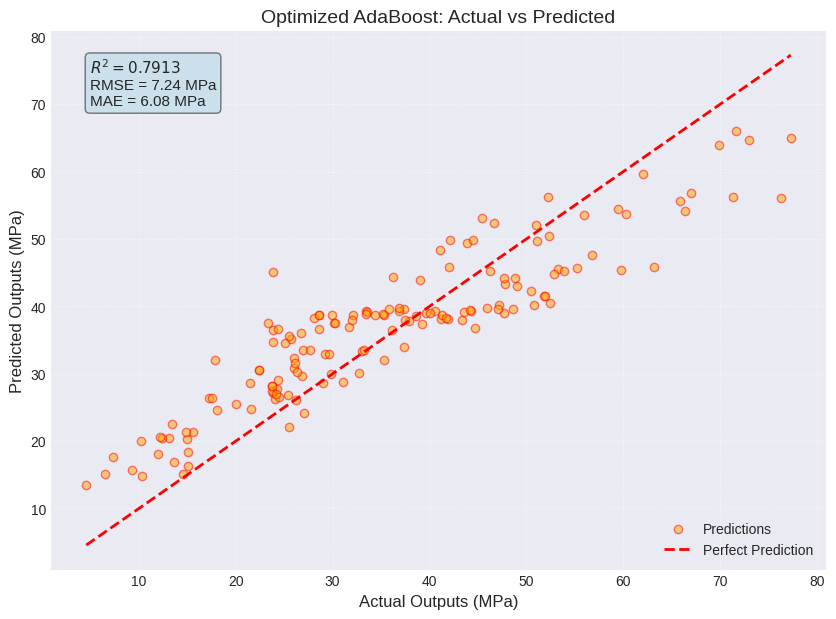

In [52]:
import matplotlib.pyplot as plt

def plot_regression_results(y_true, y_pred, title, r2, rmse, mae):
    plt.figure(figsize=(10, 7))

    # Create the scatter plot
    plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='r', facecolors='orange', label='Predictions')

    # Add the "Perfect Prediction" identity line
    max_val = max(max(y_true), max(y_pred))
    min_val = min(min(y_true), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

    # Add labels and formatting
    plt.xlabel('Actual Outputs (MPa)', fontsize=12)
    plt.ylabel('Predicted Outputs (MPa)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc='lower right')
    plt.grid(True, linestyle=':', alpha=0.6)

    # Add text box with metrics (similar to your image)
    stats_text = f"$R^2 = {r2:.4f}$\nRMSE = {rmse:.2f} MPa\nMAE = {mae:.2f} MPa"
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=11,
             verticalalignment='top', bbox=props)

    plt.show()

# Example usage for your optimized AdaBoost model
plot_regression_results(y_test, y_pred_optimized_ada, "Optimized AdaBoost: Actual vs Predicted",
                         0.7913,7.2403, 6.0764)
